In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

orders = pd.read_csv("data/orders.csv", delimiter="|")
items = pd.read_csv("data/items.csv", delimiter="|")
submission = pd.read_csv("data/submission.csv", delimiter="|")
cat_hier = pd.read_csv("data/category_hierarchy.csv", delimiter="|")

In [4]:
# merge order and item csv together

#ds_oi = data set orders and items
ds_oi = pd.merge(orders, items, how="outer", on="itemID")


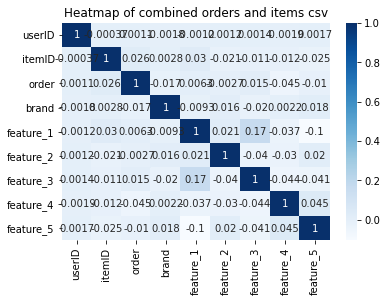

In [5]:
#check out correlation between the features/ columns of merged order item dataframe and
# the single csv-files

corr = ds_oi.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.title("Heatmap of combined orders and items csv")
plt.show()


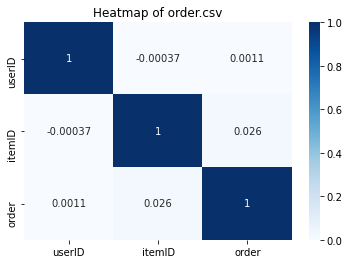

In [6]:
# heat map of orders
corr_orders = orders.corr()
sb.heatmap(corr_orders, cmap="Blues", annot=True)
plt.title("Heatmap of order.csv")
plt.show()

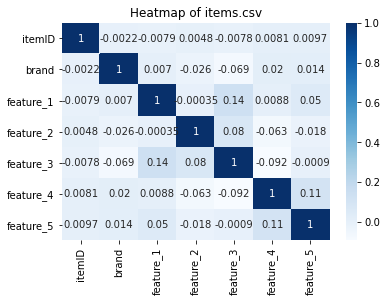

In [7]:
# heatmap items
corr_items = items.corr()
sb.heatmap(corr_items, cmap="Blues", annot=True)
plt.title("Heatmap of items.csv")
plt.show()

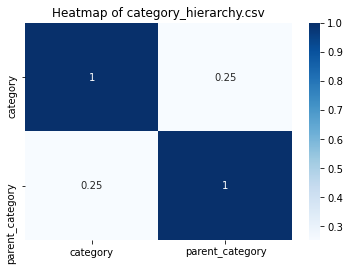

In [8]:

#heatmap of cat_hier
corr_cat_hier = cat_hier.corr()
sb.heatmap(corr_cat_hier, cmap="Blues", annot=True)
plt.title("Heatmap of category_hierarchy.csv")
plt.show()


        order
userID       
0          18
1          15
2          21
3          40
4          23


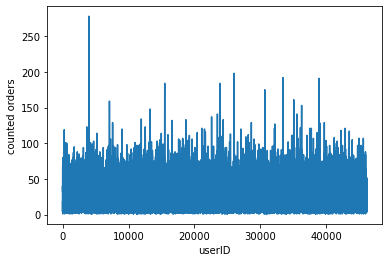

User [3986] placed the most orders with 278 orders
The average user orders 23.224630456456715 times
User [30] placed the least orders with 1 orders


In [9]:
# visualize some data of order.csv


# which user bought how much
orders_per_user = orders.drop(orders.columns[[0, 2]], axis=1)
orders_per_user = orders_per_user.groupby('userID').count()
print(orders_per_user.head())
plt.plot(orders_per_user)
plt.xlabel("userID")
plt.ylabel("counted orders")
plt.show()


# user with most order, avg. order per user, user with the least orders, etc.

#user with the most orders
most_orders= orders_per_user['order'].max()
most_orders_user = orders_per_user[orders_per_user['order'] == most_orders]
print("User %s placed the most orders with %s orders" % (most_orders_user.idxmax().values, most_orders))
#avg. order size per user
avg_orders = orders_per_user['order'].mean()
print("The average user orders %s times" % (avg_orders) )
# least ordered user
min_orders= orders_per_user['order'].min()
min_orders_user= orders_per_user[orders_per_user['order'] == min_orders]
print("User %s placed the least orders with %s orders" % (min_orders_user.idxmax().values, min_orders))



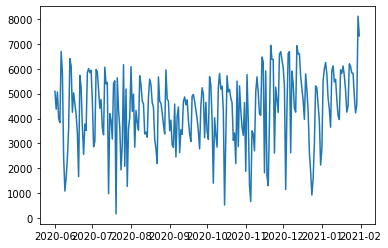

In [10]:
#want to see the orders per month

orders['date'] =  pd.to_datetime(orders['date'])
#print(orders.dtypes)
#print(orders.head())
daily_orders= orders.drop(orders.columns[[1, 2]], axis=1)
daily_orders= daily_orders.groupby('date').count()
#print(daily_orders)
plt.plot(daily_orders)
plt.show()
